## Imports

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize
import seaborn as sns
sns.set(font_scale = 2)
from sklearn.model_selection import train_test_split


# Ma'lumotlarni tozalash va formatlash (Data Cleaning and Formatting)

## 1. Ma'lumotlarni yuklash va tekshirish (Load in the Data and Examine)


In [54]:
# Read in data into a dataframe 
data = pd.read_csv(r'Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017_Data_for.csv')


In [55]:
data

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,...,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,...,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0,Washington Heights South ...
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.841559,-73.942528,12.0,10.0,255.0,Washington Heights South ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11741,14988,4940453,Advanced: 24 Monroe Place,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3002380026,3-00238-0026\t,3001927,24 Monroe Place,Not Available,...,109.6,04/26/2017 11:20:06 AM,NaN,NaN,40.696420,-73.992495,2.0,33.0,502.0,Brooklyn Heights-Cobble Hill ...
11742,14989,4940416,Advanced: 150 Joralemon St / 124 Clinton St,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3002640017,3-00264-0017\t,3002539,150 Joralemon Street,Not Available,...,153.4,04/26/2017 11:20:06 AM,NaN,NaN,40.692602,-73.993231,2.0,33.0,7.0,Brooklyn Heights-Cobble Hill ...
11743,14990,4628296,(9267) - 267 Sixth St,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3009870001​,3-00987-0001​,3413788; 3021326,267 6th Street,Not Available,...,103.6,03/23/2017 02:51:02 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11744,14991,4940464,Advanced: 27 Prospect Park West,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3010720040,3-01072-0040\t,3024968;3824680,27 Prospect Park West,Not Available,...,92.7,04/26/2017 11:20:06 AM,NaN,NaN,40.670728,-73.971752,6.0,39.0,165.0,Park Slope-Gowanus ...


##  2. Ma'lumotlar turlari (Data Types)


In [56]:
# Har bir Ustun ma'lumot turlarini va etishmayotgan qiymatlarni ko'rish
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11746 non-null  object 
 7   NYC Building Identification Number (BIN)                    11746 non-null  object 
 

##  3. Ma'lumotlarni to'g'ri turlarga aylantirish ( Convert Data to Correct Types)

In [57]:
# Har bir ustundagi "No Available" qiymatini  "np.nan" qiymati bilan almashtirish
data = data.replace({'Not Available': np.nan})

# Ustunlar bo'yicha sikl
for col in list(data.columns):
    # Raqamli ma'lumot bo'lishi kerak bo'lgan ustunlarni tanlash
    if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in 
        col or 'therms' in col or 'gal' in col or 'Score' in col):
        # Ma'lumotlar turini floatga aylantirish
        data[col] = data[col].astype(float)

## Har bir ustun uchun statistika 

In [58]:
data.describe()

,Order,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,...,Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract
count,11746.000000,1.174600e+04,1.162800e+04,1.174400e+04,3741.000000,1484.000000,11746.000000,11746.000000,11746.000000,9642.000000,...,1.168100e+04,1.174600e+04,7.762000e+03,7762.000000,11583.000000,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000
mean,7185.759578,3.642958e+06,1.732695e+05,1.605524e+05,22778.682010,12016.825270,1948.738379,1.289971,98.762557,59.854594,...,2.076339e+03,1.673739e+05,1.591798e+04,136.172432,385.908029,40.754379,-73.957057,7.140673,15.771275,4977.596647
std,4323.859984,1.049070e+06,3.367055e+05,3.095746e+05,55094.441422,27959.755486,30.576386,4.017484,7.501603,29.993586,...,5.931295e+04,3.189238e+05,1.529524e+05,1730.726938,9312.736225,0.080120,0.046337,3.954129,15.674375,13520.422990
min,1.000000,7.365000e+03,5.002800e+04,5.400000e+01,0.000000,0.000000,1600.000000,0.000000,0.000000,1.000000,...,-2.313430e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,40.516065,-74.243582,1.000000,1.000000,1.000000
25%,3428.250000,2.747222e+06,6.524000e+04,6.520100e+04,4000.000000,1720.750000,1927.000000,1.000000,100.000000,37.000000,...,9.480000e+01,6.699400e+04,2.595400e+03,27.150000,99.400000,40.707226,-73.984662,4.000000,4.000000,100.000000
50%,6986.500000,3.236404e+06,9.313850e+04,9.132400e+04,8654.000000,5000.000000,1941.000000,1.000000,100.000000,65.000000,...,1.718000e+02,9.408000e+04,4.692500e+03,45.095000,124.900000,40.759130,-73.962810,7.000000,9.000000,201.000000
75%,11054.500000,4.409092e+06,1.596140e+05,1.532550e+05,20000.000000,12000.000000,1966.000000,1.000000,100.000000,85.000000,...,4.249000e+02,1.584140e+05,8.031875e+03,70.805000,162.750000,40.817623,-73.932443,9.000000,33.000000,531.500000
max,14993.000000,5.991312e+06,1.354011e+07,1.421712e+07,962428.000000,591640.000000,2019.000000,161.000000,100.000000,100.000000,...,4.764375e+06,1.421712e+07,6.594604e+06,96305.690000,912801.100000,40.912869,-73.715543,56.000000,51.000000,155101.000000


## 4. Yetishmayotgan qiymatlar (Missing Values)

### Har bir ustun bo'yicha yetishmayotgan qiymatlar nechta ekanligi va shu ustunning qancha foizini tashkil qilishini topamiz

In [59]:

def missing_values_table(df):
        
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Yetishmayotgan qiymatlar', 1 : '% Toliq ustunning necha foizini tashkil qiladi'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% Toliq ustunning necha foizini tashkil qiladi', ascending=False).round(1)
       
        
        return mis_val_table_ren_columns

### 46 ta ustunda yetishmayotgan qiymatlar borligini ko'rish mumkin

In [60]:
missing_values_table(data)

,Yetishmayotgan qiymatlar,% Toliq ustunning necha foizini tashkil qiladi
Fuel Oil #1 Use (kBtu),11737,99.9
Diesel #2 Use (kBtu),11730,99.9
Address 2,11539,98.2
Fuel Oil #5 & 6 Use (kBtu),11152,94.9
District Steam Use (kBtu),10810,92.0
Fuel Oil #4 Use (kBtu),10425,88.8
3rd Largest Property Use Type - Gross Floor Area (ft²),10262,87.4
3rd Largest Property Use Type,10262,87.4
Fuel Oil #2 Use (kBtu),9165,78.0
2nd Largest Property Use Type,8005,68.2


([here is a discussion](https://discuss.analyticsvidhya.com/t/what-should-be-the-allowed-percentage-of-missing-values/2456))  

### Yetishmayotgan qiymatlari 50 foizdan baland bo'lgan ustunlarni uchirib yuborish

In [61]:
missing_df = missing_values_table(data);
missing_columns = list(missing_df[missing_df['% Toliq ustunning necha foizini tashkil qiladi'] > 50].index)
print('Biz %d ta ustunni olib tashlaymiz.' % len(missing_columns))

Biz 11 ta ustunni olib tashlaymiz.


In [62]:
data = data.drop(columns = list(missing_columns))

# 5. Ma'lumotlarini tahlil qilish (Exploratory Data Analysis)

## Single Variable Plots

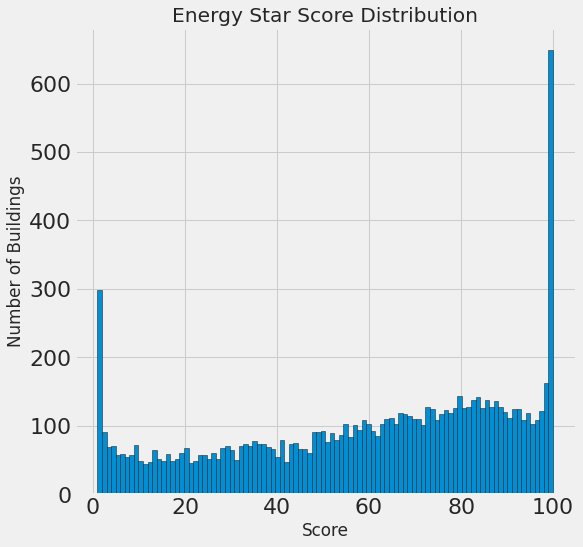

In [63]:
figsize(8, 8)
data = data.rename(columns = {'ENERGY STAR Score': 'score'})
plt.style.use('fivethirtyeight')
plt.hist(data['score'].dropna(), bins = 100, edgecolor = 'k');
plt.xlabel('Score'); plt.ylabel('Number of Buildings'); 
plt.title('Energy Star Score Distribution');

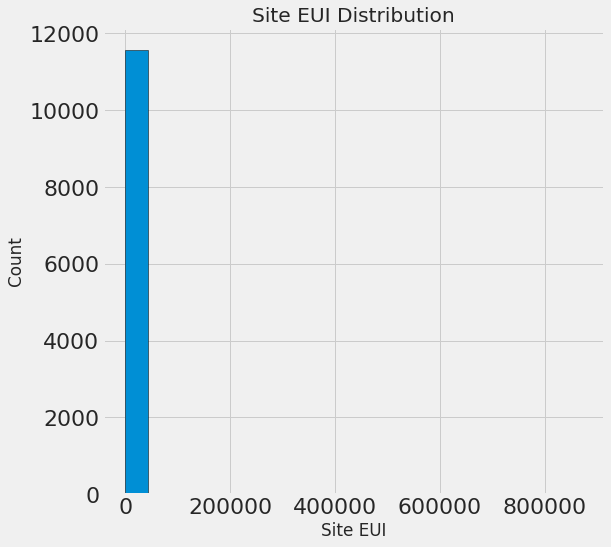

In [64]:
figsize(8, 8)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); plt.title('Site EUI Distribution');

### Yuqoridagi taqsimot grafigidan bilish mumkinki, ustunlarda g'ayrioddiy qiymatlar bor

In [65]:
data['Site EUI (kBtu/ft²)'].describe()

count     11583.000000
mean        280.071484
std        8607.178877
min           0.000000
25%          61.800000
50%          78.500000
75%          97.600000
max      869265.000000
Name: Site EUI (kBtu/ft²), dtype: float64

In [66]:
data['Site EUI (kBtu/ft²)'].dropna().sort_values().tail(10)

3173     51328.8
3170     51831.2
3383     78360.1
8269     84969.6
3263     95560.2
8268    103562.7
8174    112173.6
3898    126307.4
7       143974.4
8068    869265.0
Name: Site EUI (kBtu/ft²), dtype: float64

###  G'ayrioddiy qiymatlarni olib tashlash (Removing Outliers)

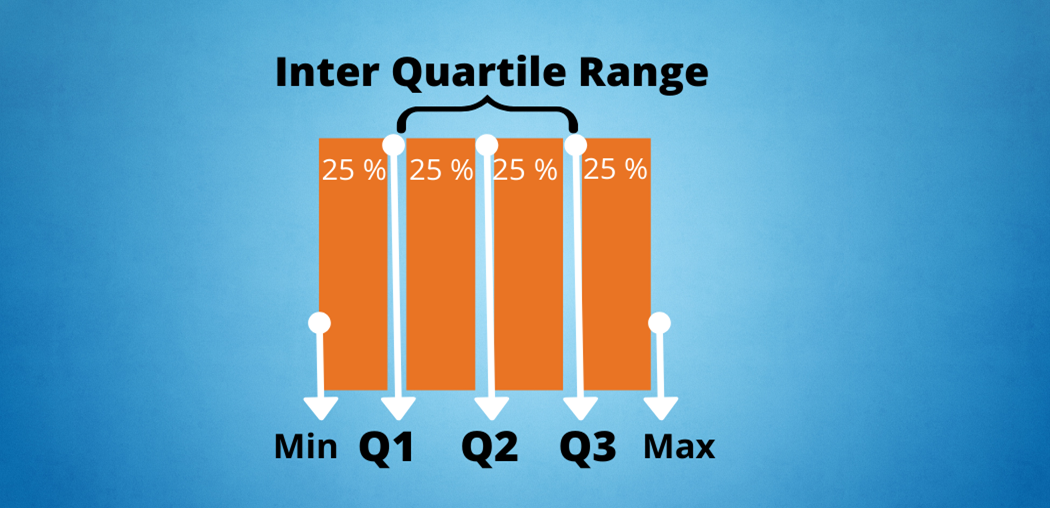

In [67]:
# Birinchi va uchinchi kvartilni hisoblash
first_quartile = data['Site EUI (kBtu/ft²)'].describe()['25%']
third_quartile = data['Site EUI (kBtu/ft²)'].describe()['75%']

# Kvartallar oralig'i
iqr = third_quartile - first_quartile

#  G'ayrioddiy qiymatlarni olib tashlash
data = data[(data['Site EUI (kBtu/ft²)'] > (first_quartile - 3 * iqr)) &
            (data['Site EUI (kBtu/ft²)'] < (third_quartile + 3 * iqr))]

### Qaytadan taqsimot grafigini chizib ko'ramiz

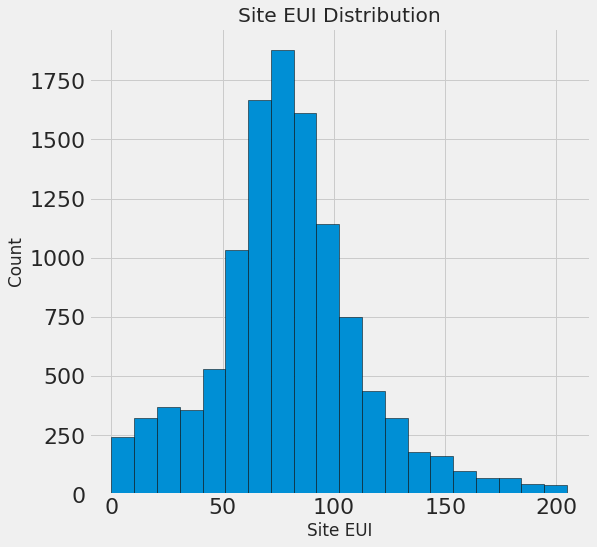

In [68]:
# Histogram Plot of Site EUI
figsize(8, 8)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); plt.title('Site EUI Distribution');

### Yuqorida ko'rish mumkinki  g'ayrioddiy qiymatlar olib tashlangandan keyin taqsimotimiz ancha yaxshilandi

##  6. Maqsad va xususiyat orasida o'zaro bog'lanishni qidirish (Looking for Relationships)
### Kategorik o'zgaruvchilarning biz bashorat qilmoqchi bo'lgan "score" ustuniga ta'sir qilish yoki qilmasligini aniqlash uchun taqsimot grafigini chizamiz. 

In [69]:
# 100 dan ortiq o'lchovli binolar ro'yxatini ajratib olish
types = data.dropna(subset=['score'])
types = types['Largest Property Use Type'].value_counts()
types = list(types[types.values > 100].index)

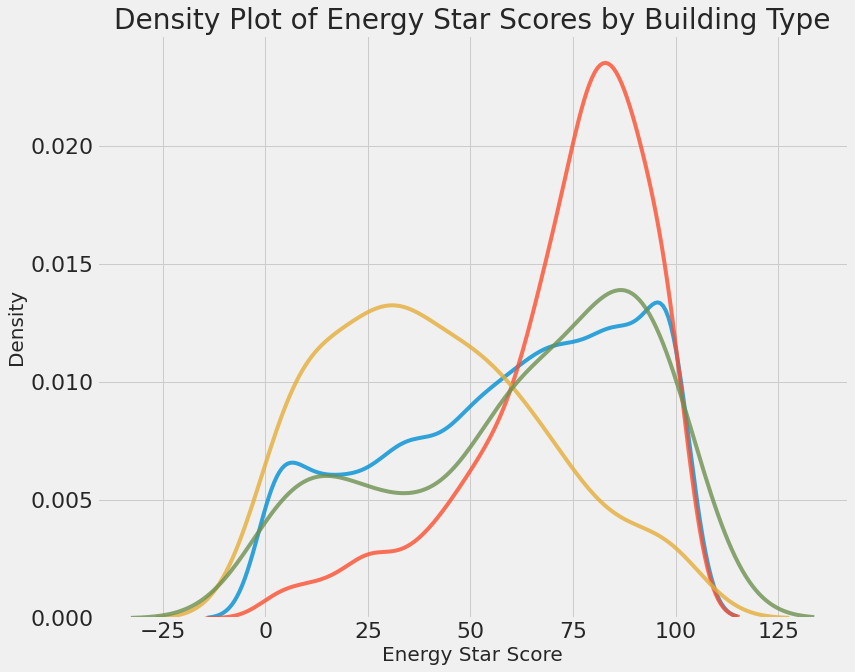

In [70]:
# Bino turlari bilan "score" ustunini orasida taqsimot grafigi 
figsize(12, 10)
for b_type in types:
    # Bino turini tanlash
    subset = data[data['Largest Property Use Type'] == b_type]
    
    # "score" ustunining zichlik grafigi
    sns.kdeplot(subset['score'].dropna(),
               label = b_type, shade = False, alpha = 0.8);
    
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Energy Star Scores by Building Type', size = 28);

### Yuqoridagi grafikdan biz bino turi "score" ustuniga ta'sir qilishini ko'rishimiz mumkin

### Endi biz "Borough" (tumanlar) ustuni "score" ustuniga tasir qilish yoki qilmasligini ko'rib chiqamiz

In [71]:
# 100 dan ortiq elementlarga ega bo'lgan tumanlar ro'yxatini ajratib olish
boroughs = data.dropna(subset=['score'])
boroughs = boroughs['Borough'].value_counts()
boroughs = list(boroughs[boroughs.values > 100].index)

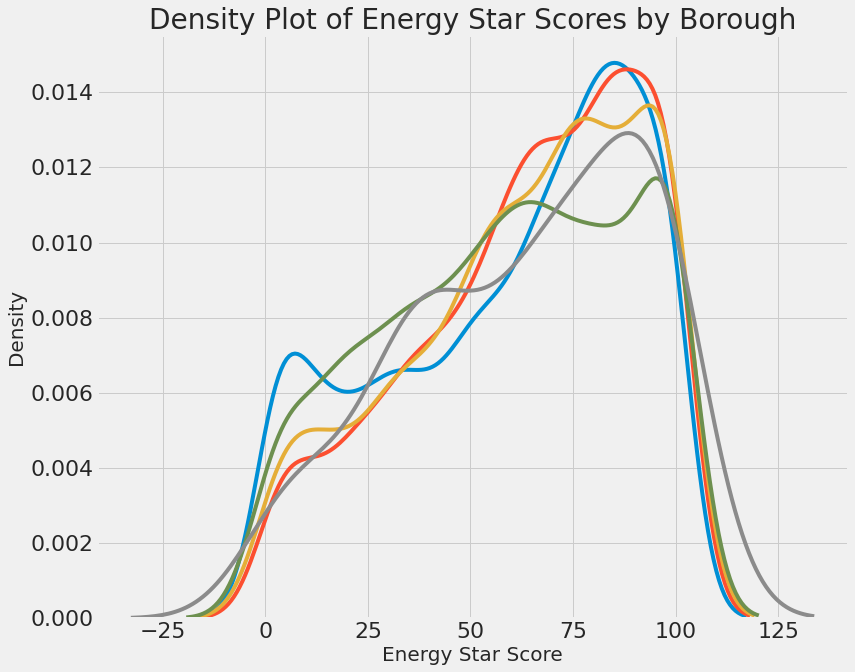

In [72]:
# Tumanlar ustuni bilan "score" ustunini orasida taqsimot grafigi 
figsize(12, 10)
for borough in boroughs:
    # Tumanlarni tanlash 
    subset = data[data['Borough'] == borough]
    # "score" ustunining zichlik grafigi
    sns.kdeplot(subset['score'].dropna(),
               label = borough);
    
plt.xlabel('Energy Star Score', size = 20); 
plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Energy Star Scores by Borough', size = 28);

### Tumanlar "score" ustuniga juda kam ta'sir qilyotganini ko'rish mumkin. Kam ta'sir qilsa ham data set kichkina bo'lganligi sabab bu ustunni ham qoldirishimiz mumkin

## Correlations between Features and Target
Xususiyatlar (x lar) va maqsad (y) o'rtasidagi korrelyatsiyasini hisoblaymiz.

In [73]:
# Barcha korrelyatsiyalarni topish va tartiblash
correlations_data = data.corr()['score'].sort_values()

# Eng salbiy korrelyatsiyalarning dastlabki 15 tasini chop qilish
print(correlations_data.head(15), '\n')

# Eng ijobiy korrelyatsiyalarning dastlabki 15 tasini chop qilish
print(correlations_data.tail(15))

Site EUI (kBtu/ft²)                                          -0.723864
Weather Normalized Site EUI (kBtu/ft²)                       -0.713993
Weather Normalized Source EUI (kBtu/ft²)                     -0.645542
Source EUI (kBtu/ft²)                                        -0.641037
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.358394
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.346046
Direct GHG Emissions (Metric Tons CO2e)                      -0.147792
Weather Normalized Site Natural Gas Use (therms)             -0.135211
Natural Gas Use (kBtu)                                       -0.133648
Year Built                                                   -0.121249
Total GHG Emissions (Metric Tons CO2e)                       -0.113136
Electricity Use - Grid Purchase (kBtu)                       -0.050639
Weather Normalized Site Electricity (kWh)                    -0.048207
Latitude                                                     -0.048196
Proper

### 7. Xususiyat muhandisligi va tanlovi (Feature Engineering and Selection)

In [74]:
# Copy the original data
features = data.copy()

# Select the numeric columns
numeric_subset = data.select_dtypes('number')

# Create columns with log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'score':
        next
    else:
        numeric_subset['log_' + col] = np.log(numeric_subset[col])
        
# Select the categorical columns
categorical_subset = data[['Borough', 'Largest Property Use Type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

features.shape

<ipython-input-74-833564b92e35>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_subset['log_' + col] = np.log(numeric_subset[col])
/opt/tljh/user/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/tljh/user/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


(11319, 110)

## 8. Kollinear ( biriga juda o'xshash) xususiyatlarni  olib tashlash (Remove Collinear Features)
Ayni paytda bizda 109 ta xususiyat (x) va bitta "score" maqsad (y) bor. Bu xususiyatlarning hammasi ham "score" ustunini bashorat qilish uchun muhim emas va bu xususiyatlarning bir nechtasi ham ortiqcha, chunki ular o'zaro bog'liqdir.

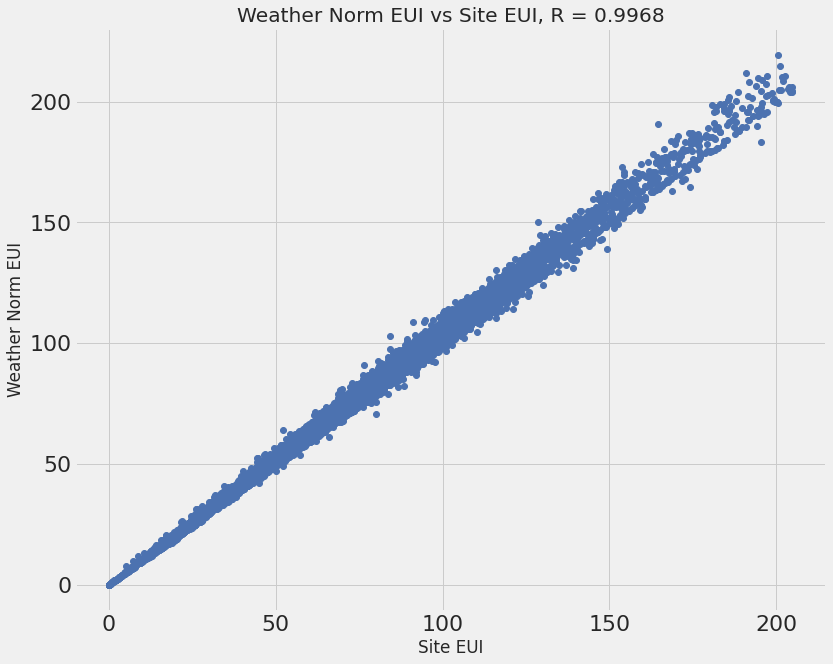

In [75]:
plot_data = data[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna()

plt.plot(plot_data['Site EUI (kBtu/ft²)'], plot_data['Weather Normalized Site EUI (kBtu/ft²)'], 'bo')
plt.xlabel('Site EUI'); plt.ylabel('Weather Norm EUI')
plt.title('Weather Norm EUI vs Site EUI, R = %0.4f' % np.corrcoef(data[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna(), rowvar=False)[0][1]);

In [76]:
def remove_collinear_features(x, threshold):
    
    # "score" ustunini ajratib olish
    y = x['score']
    x = x.drop(columns = ['score'])
    
    # Korrelyatsiya matritsasini hisoblash
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Korrelyatsiyani o'zaro har bir ustun bo'yicha hisoblash
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # Agar korrelyatsiya biz qo'ygan chegaradan oshsa ikkita ustundan bittasini ajratib olamiz
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Korrelyatsiya biz qo'ygan chegaradan oshganda tanlangan ustunni o'chirish
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x = x.drop(columns = ['Weather Normalized Site EUI (kBtu/ft²)', 
                          'Water Use (All Water Sources) (kgal)',
                          'log_Water Use (All Water Sources) (kgal)',
                          'Largest Property Use Type - Gross Floor Area (ft²)'])
    
    
    x['score'] = y
               
    return x

In [77]:
# Funksiyani chaqirib korrelyatsiya  0.6 dan katta bo'lgan ikkita ustundan bittasini o'chirish
features = remove_collinear_features(features, 0.6);

In [78]:
features  = features.dropna(axis=1, how = 'all')
features.shape

(11319, 65)

## 9. Datani train va test qismlarga ajratish (Split Into Training and Testing Sets)

In [79]:
# "score" ustunidagi aniqlanmagan qiymatlarni tashlab qolganini ajratib olish
score = features[features['score'].notnull()]

print(score.shape)

(9461, 65)


In [80]:
# Xususiyatlar (x) va maqsadlarni (y) ajratib olish
features = score.drop(columns='score')
targets = pd.DataFrame(score['score'])

# inf va -inf ni nan bilan almashtirish (keyinroq hisoblash uchun talab qilinadi)
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

# 70% train va 30% test toʻplamiga ajratish
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6622, 64)
(2839, 64)
(6622, 1)
(2839, 1)


In [81]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import  MinMaxScaler

In [82]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
# Train on the training features
imputer.fit(x_train)

# Transform both training data and testing data
x_train = imputer.transform(x_train)
x_test = imputer.transform(x_test)

In [83]:
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(x_train)

# Transform both the training and testing data
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## 1.KNeighborsRegressor

In [84]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
mean_absolute_error(y_pred, y_test)

12.705177879535048

## 2.RandomForestRegressor

In [86]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
mean_absolute_error(y_pred, y_test)

<ipython-input-86-1b110bed2557>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


9.535501937301866

## 3.LinearRegression

In [87]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
mean_absolute_error(y_pred, y_test)

13.465092871677838

## 4.DecisionTreeRegressor

In [88]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
mean_absolute_error(y_pred, y_test)

12.819654808030997

## 5.SVR

In [90]:
from sklearn.svm import SVR
sv = SVR()
sv.fit(x_train, y_train)
y_pred = sv.predict(x_test)
mean_absolute_error(y_pred, y_test)

/home/jupyter-ruzmat/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


14.208128241133283

## 6.GradientBoostingRegressor 

In [89]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)
mean_absolute_error(y_pred, y_test)

/home/jupyter-ruzmat/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


10.01073625826068

## 7.AdaBoostRegressor

In [91]:
from sklearn.ensemble import AdaBoostRegressor
ab = AdaBoostRegressor()
ab.fit(x_train, y_train)
y_pred = ab.predict(x_test)
mean_absolute_error(y_pred, y_test)

/home/jupyter-ruzmat/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


15.642231299594531

## 8.ExtraTreesRegressor

In [92]:
from sklearn.ensemble import ExtraTreesRegressor
ext = ExtraTreesRegressor()
ext.fit(x_train, y_train)
y_pred = ext.predict(x_test)
mean_absolute_error(y_pred, y_test)

<ipython-input-92-b1e97963b191>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ext.fit(x_train, y_train)


9.366308559351886

In [95]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [96]:
# Loss function to be optimized
loss = ['ls', 'lad', 'huber']

# Number of trees used in the boosting process
n_estimators = [100, 500, 900, 1100, 1500]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'loss': loss,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [97]:
# Create the model to use for hyperparameter tuning
model = GradientBoostingRegressor(random_state = 42)

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=25, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

In [99]:
random_cv.fit(x_train, y_train)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


/home/jupyter-ruzmat/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


RandomizedSearchCV(cv=4, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'loss': ['ls', 'lad', 'huber'],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 4, 6, 10],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=1)

In [100]:
random_cv.best_estimator_

GradientBoostingRegressor(loss='lad', max_depth=5, min_samples_leaf=6,
                          min_samples_split=6, n_estimators=500,
                          random_state=42)

In [101]:
gb = GradientBoostingRegressor(loss='lad', max_depth=5, min_samples_leaf=6,
                          min_samples_split=6, n_estimators=500,
                          random_state=42)
gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)
mean_absolute_error(y_pred, y_test)

/home/jupyter-ruzmat/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


9.076524482768104